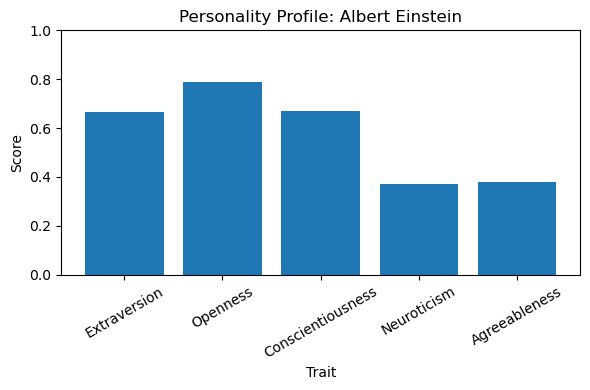

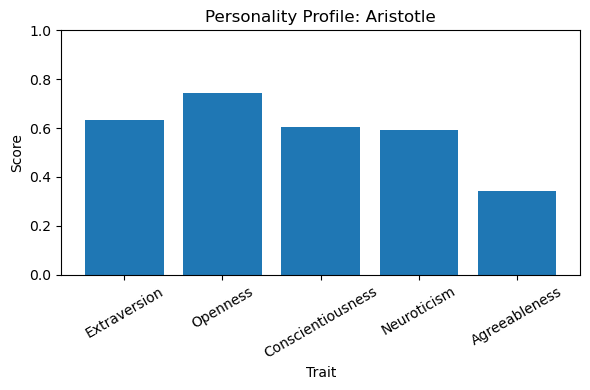

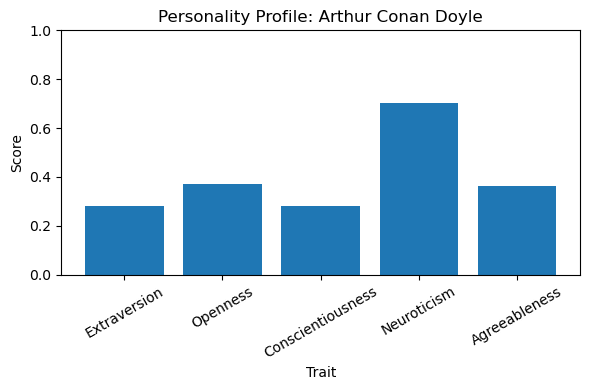

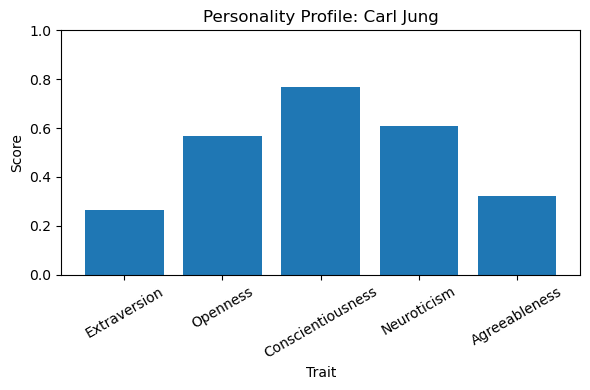

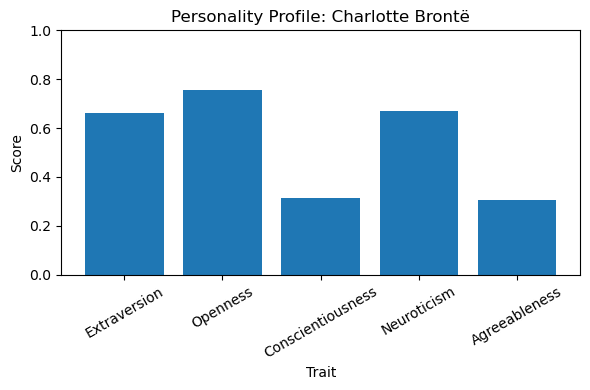

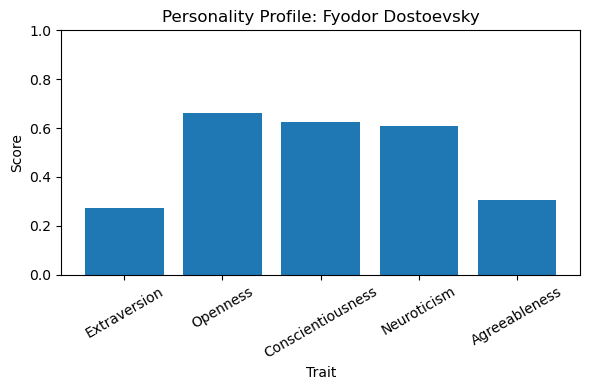

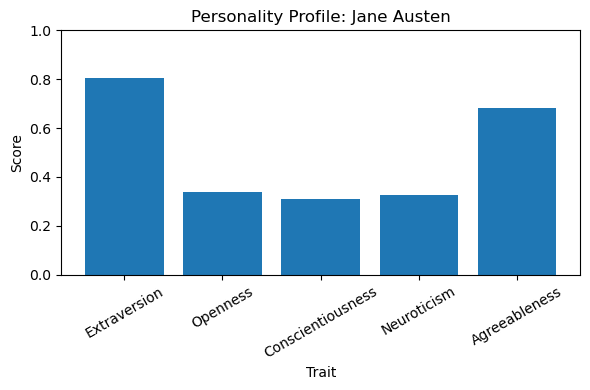

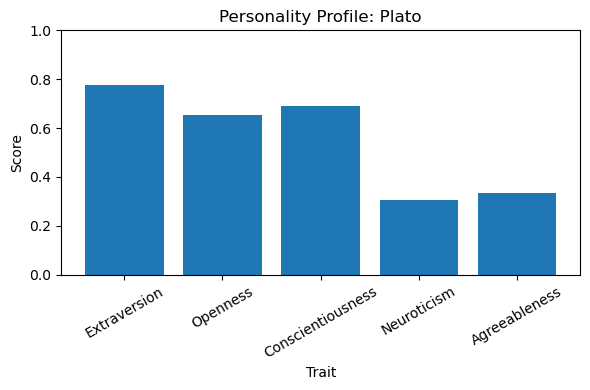

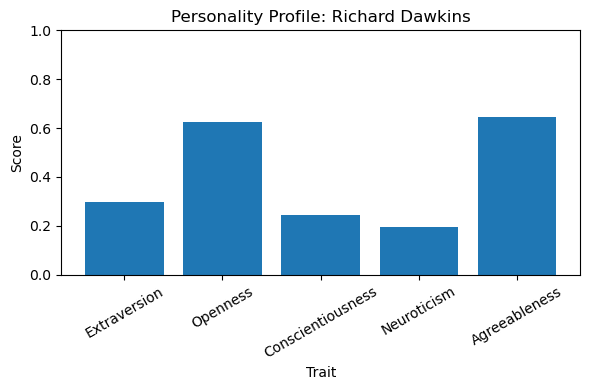

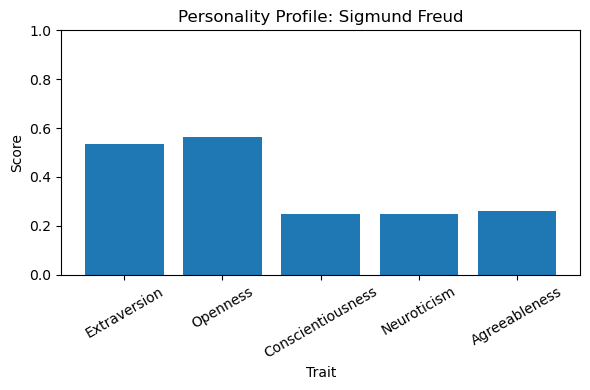

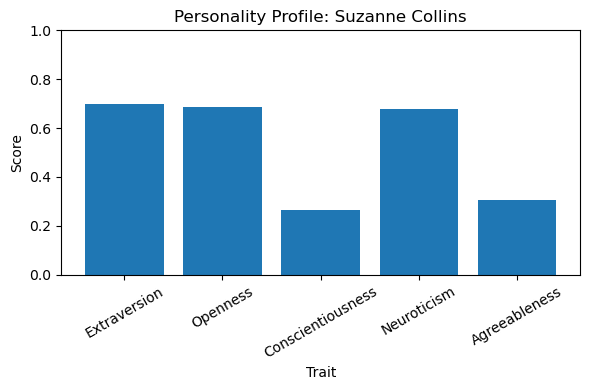

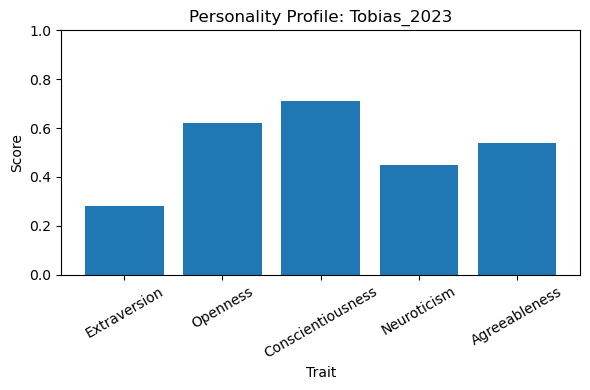

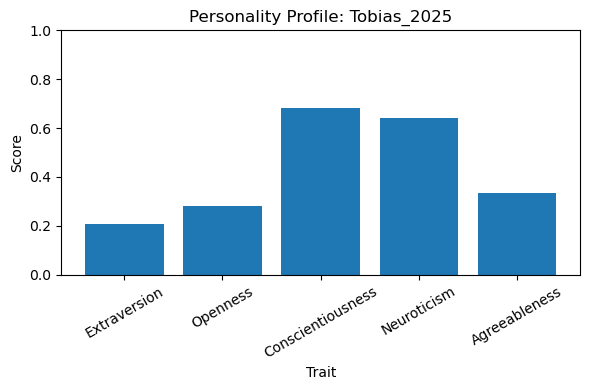

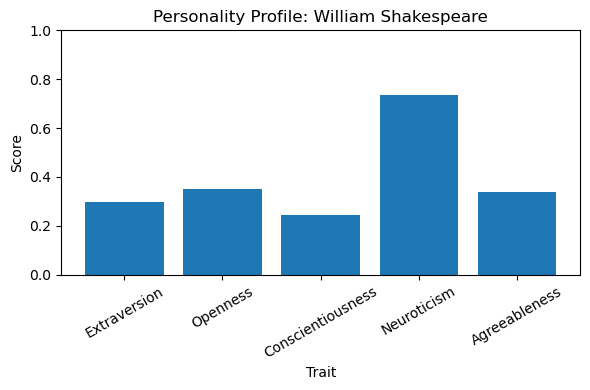

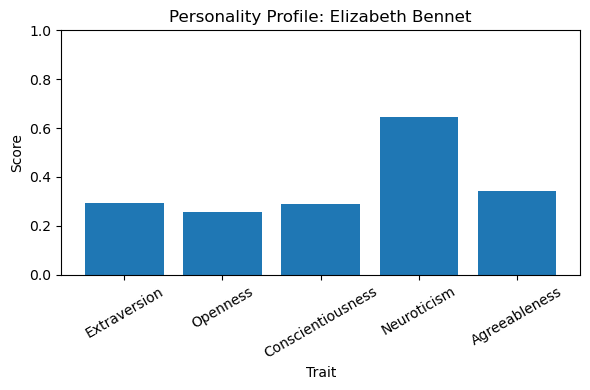

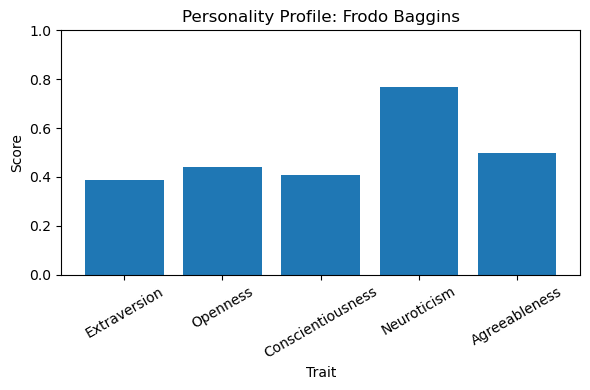

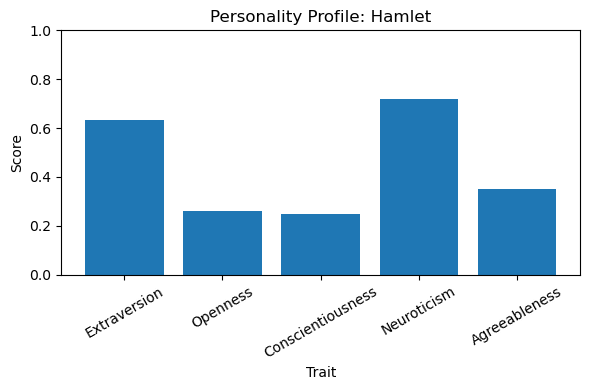

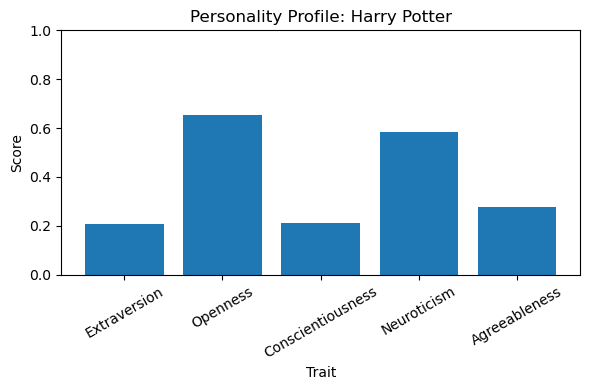

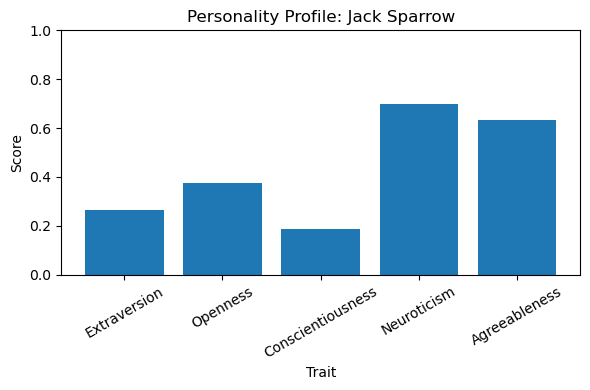

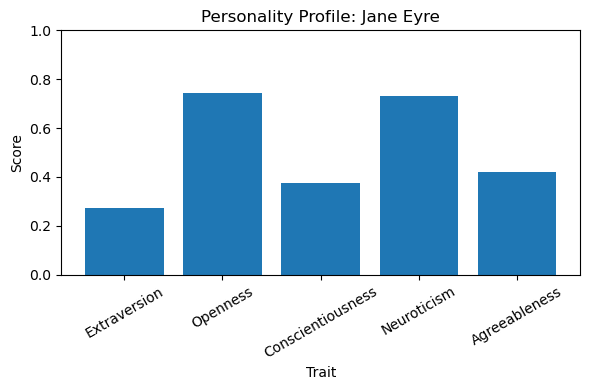

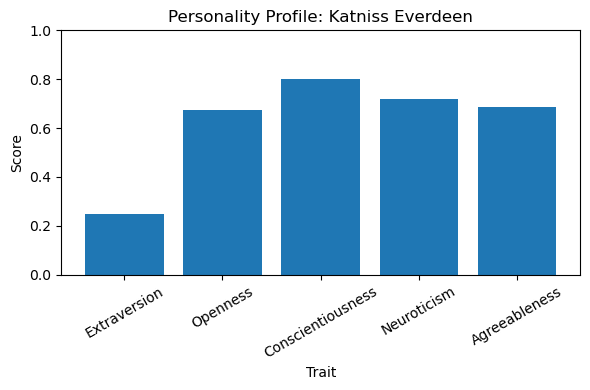

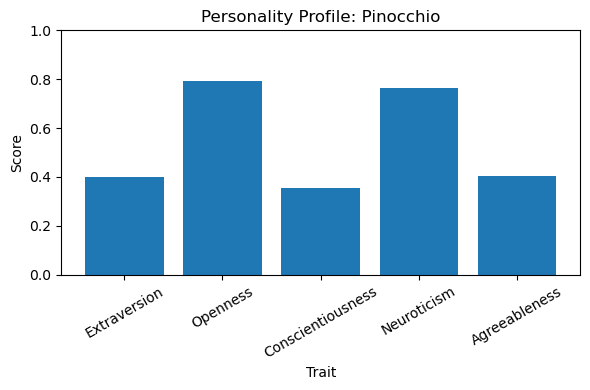

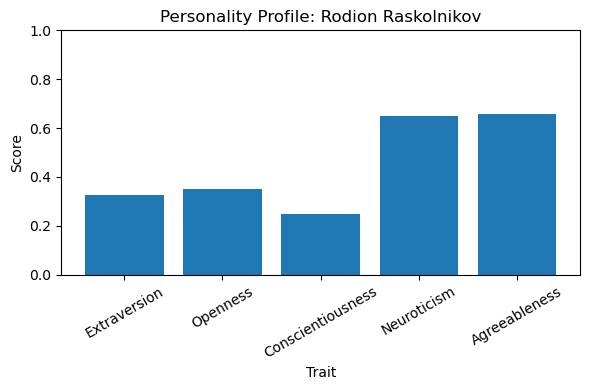

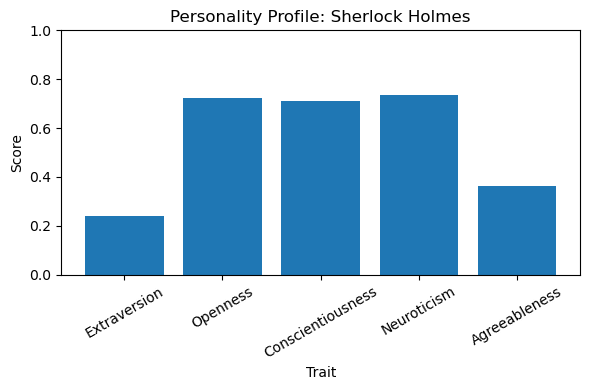

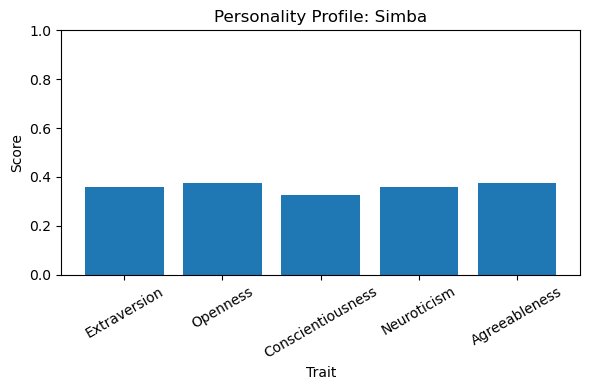

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("/Users/tobiasnikolaisen/Documents/Github/HEL8048/bigfive_patterns/datasets/merged_output.csv")

# Traits to plot
traits = ["extraversion", "openness", "conscientiousness", "neuroticism", "agreeableness"]

# Folder to save plots
output_dir = "/Users/tobiasnikolaisen/Documents/Github/HEL8048/bigfive_patterns/results/individual_personality_profiles"

# Loop through each individual
for idx, row in df.iterrows():
    name = row["name"] if "name" in row and pd.notnull(row["name"]) else f"ID {row['id']}"
    
    # Build filename: e.g. Albert_Einstein_profile.png
    safe_base = "_".join(str(name).split())  # Replace spaces with underscores
    safe_base = "".join(c if c.isalnum() or c in "_-" else "_" for c in safe_base)  # Clean filename
    filename = f"{output_dir}/{safe_base}_profile.png"

    # Get trait values
    values = row[traits].values
    
    # Create bar plot
    plt.figure(figsize=(6, 4))
    plt.bar(traits, values)
    plt.ylim(0, 1)
    plt.title(f"Personality Profile: {name}")
    plt.ylabel("Score")
    plt.xlabel("Trait")
    plt.xticks(ticks=range(len(traits)), labels=[t.capitalize() for t in traits], rotation=30)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("merged_output.csv")

# === STEP 1: Define traits and their actual facets from your dataset ===

traits = {
    "extraversion": [
        "active", "assertive", "cheerful",
        "excitement_seeking", "outgoing", "gregariousness"
    ],
    "openness": [
        "adventurous", "artistic", "emotionally_aware",
        "imaginative", "intellectual", "authority_challenging"
    ],
    "conscientiousness": [
        "cautious", "disciplined", "dutiful",
        "achievement_striving", "orderliness", "self_efficacy"
    ],
    "neuroticism": [
        "melancholy", "self_conscious", "stress_prone",
        "fiery", "prone_to_worry", "immoderation"
    ],
    "agreeableness": [
        "cooperative", "trusting", "altruism",
        "modesty", "uncompromising", "sympathy"
    ]
}

Correlation matrix for main Big Five traits:
                   extraversion  openness  conscientiousness  neuroticism  \
extraversion           1.000000  0.160775          -0.079509    -0.360195   
openness               0.160775  1.000000           0.389313    -0.072191   
conscientiousness     -0.079509  0.389313           1.000000    -0.023523   
neuroticism           -0.360195 -0.072191          -0.023523     1.000000   
agreeableness         -0.113817 -0.180131          -0.043206    -0.102120   

                   agreeableness  
extraversion           -0.113817  
openness               -0.180131  
conscientiousness      -0.043206  
neuroticism            -0.102120  
agreeableness           1.000000  


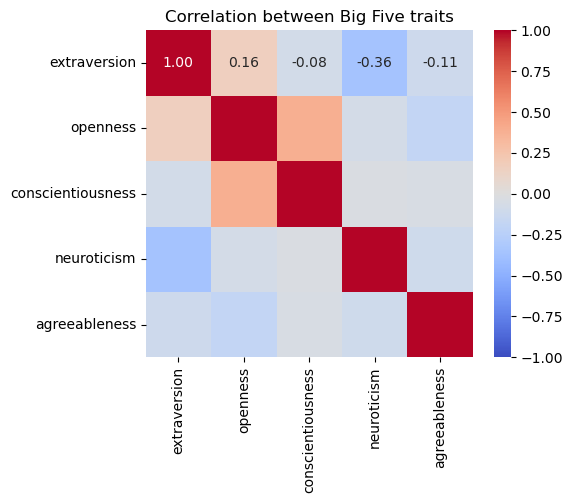

In [8]:
# === STEP 2: Correlation matrix of the main traits ===

main_traits = list(traits.keys())
main_trait_corr = df[main_traits].corr()

print("Correlation matrix for main Big Five traits:")
print(main_trait_corr)

plt.figure(figsize=(6, 5))
sns.heatmap(main_trait_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True,
            vmin=-1, vmax=1)
plt.title("Correlation between Big Five traits")
plt.tight_layout()
plt.show()


Correlation matrix for Extraversion facets:
                      active  assertive  cheerful  excitement_seeking  \
active              1.000000   0.340721 -0.113463            0.077918   
assertive           0.340721   1.000000  0.101955            0.358501   
cheerful           -0.113463   0.101955  1.000000            0.502712   
excitement_seeking  0.077918   0.358501  0.502712            1.000000   
outgoing            0.349956   0.307992  0.032591            0.264500   
gregariousness      0.436489   0.063181 -0.161845            0.089780   

                    outgoing  gregariousness  
active              0.349956        0.436489  
assertive           0.307992        0.063181  
cheerful            0.032591       -0.161845  
excitement_seeking  0.264500        0.089780  
outgoing            1.000000       -0.036820  
gregariousness     -0.036820        1.000000  


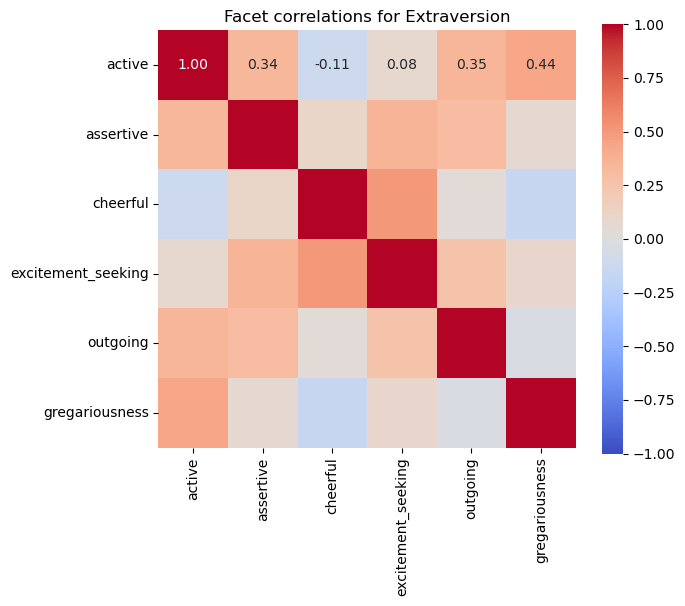


Correlation matrix for Openness facets:
                       adventurous  artistic  emotionally_aware  imaginative  \
adventurous               1.000000  0.276295           0.217001     0.075015   
artistic                  0.276295  1.000000          -0.094892     0.606438   
emotionally_aware         0.217001 -0.094892           1.000000    -0.069985   
imaginative               0.075015  0.606438          -0.069985     1.000000   
intellectual              0.165761  0.580515           0.257574     0.579975   
authority_challenging    -0.038558  0.326185          -0.057045     0.344957   

                       intellectual  authority_challenging  
adventurous                0.165761              -0.038558  
artistic                   0.580515               0.326185  
emotionally_aware          0.257574              -0.057045  
imaginative                0.579975               0.344957  
intellectual               1.000000               0.259595  
authority_challenging      0.259

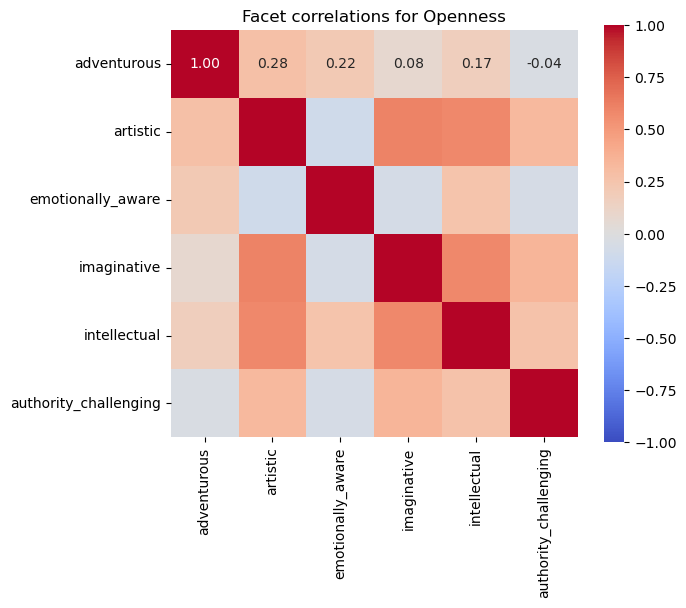


Correlation matrix for Conscientiousness facets:
                      cautious  disciplined   dutiful  achievement_striving  \
cautious              1.000000    -0.479020  0.313417             -0.128113   
disciplined          -0.479020     1.000000 -0.061989              0.154959   
dutiful               0.313417    -0.061989  1.000000              0.430510   
achievement_striving -0.128113     0.154959  0.430510              1.000000   
orderliness           0.140013     0.009362  0.180685              0.390885   
self_efficacy         0.030434     0.442552  0.402876              0.661465   

                      orderliness  self_efficacy  
cautious                 0.140013       0.030434  
disciplined              0.009362       0.442552  
dutiful                  0.180685       0.402876  
achievement_striving     0.390885       0.661465  
orderliness              1.000000       0.559487  
self_efficacy            0.559487       1.000000  


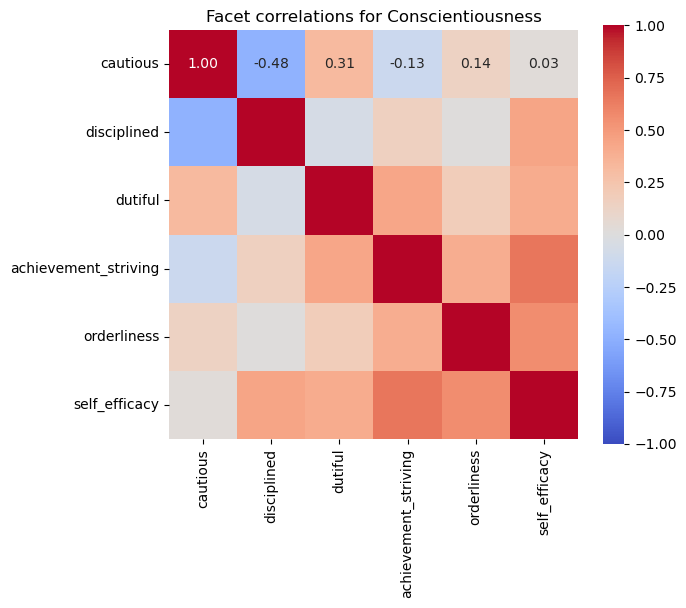


Correlation matrix for Neuroticism facets:
                melancholy  self_conscious  stress_prone     fiery  \
melancholy        1.000000        0.376532      0.212270  0.399166   
self_conscious    0.376532        1.000000      0.614918  0.017477   
stress_prone      0.212270        0.614918      1.000000  0.053131   
fiery             0.399166        0.017477      0.053131  1.000000   
prone_to_worry    0.355351        0.279953      0.206874  0.564312   
immoderation     -0.038022       -0.062153     -0.057397 -0.152492   

                prone_to_worry  immoderation  
melancholy            0.355351     -0.038022  
self_conscious        0.279953     -0.062153  
stress_prone          0.206874     -0.057397  
fiery                 0.564312     -0.152492  
prone_to_worry        1.000000     -0.133238  
immoderation         -0.133238      1.000000  


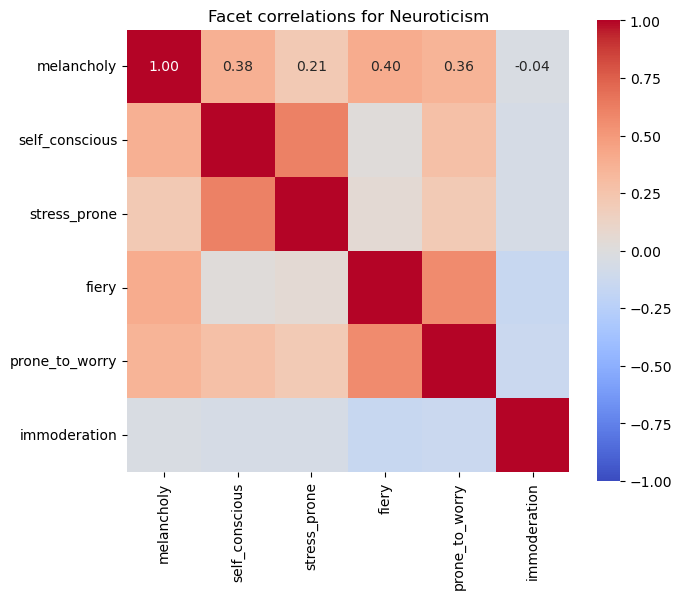


Correlation matrix for Agreeableness facets:
                cooperative  trusting  altruism   modesty  uncompromising  \
cooperative        1.000000  0.137741  0.141331  0.273123        0.140385   
trusting           0.137741  1.000000  0.082405 -0.160566       -0.158515   
altruism           0.141331  0.082405  1.000000  0.287301        0.188360   
modesty            0.273123 -0.160566  0.287301  1.000000       -0.191724   
uncompromising     0.140385 -0.158515  0.188360 -0.191724        1.000000   
sympathy           0.102165 -0.178254  0.106471  0.313298       -0.146636   

                sympathy  
cooperative     0.102165  
trusting       -0.178254  
altruism        0.106471  
modesty         0.313298  
uncompromising -0.146636  
sympathy        1.000000  


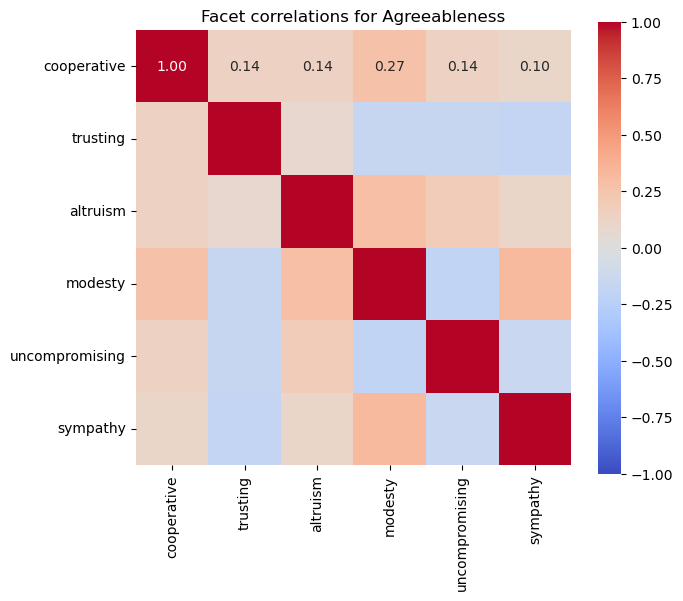

In [9]:
# === STEP 3: Correlation matrix within each trait's facets ===

for trait, facets in traits.items():
    facets_present = [f for f in facets if f in df.columns]
    if len(facets_present) <= 1:
        continue

    facet_data = df[facets_present]

    # Compute correlation matrix; NaNs occur for constant columns
    corr = facet_data.corr(numeric_only=True, method="pearson", min_periods=1)
    corr_display = corr.fillna(0)

    print(f"\nCorrelation matrix for {trait.title()} facets:")
    print(corr)

    plt.figure(figsize=(7, 6))
    sns.heatmap(corr_display, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True,
                vmin=-1, vmax=1)
    plt.title(f"Facet correlations for {trait.title()}")
    plt.tight_layout()
    plt.show()

In [10]:
# Compare two individuals
id1 = "1"  # Replace with desired ID
id2 = "2"  # Replace with desired ID

person1 = df[df["id"] == id1].iloc[0]
person2 = df[df["id"] == id2].iloc[0]

name1 = person1["name"] if "name" in person1 and pd.notnull(person1["name"]) else f"ID {person1['id']}"
name2 = person2["name"] if "name" in person2 and pd.notnull(person2["name"]) else f"ID {person2['id']}"

scores1 = person1[traits].values
scores2 = person2[traits].values

import numpy as np
x = np.arange(len(traits))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, scores1, width, label=name1)
plt.bar(x + width/2, scores2, width, label=name2)
plt.xticks(ticks=x, labels=[t.capitalize() for t in traits], rotation=30)
plt.xlabel("Trait")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title(f"Big Five Comparison: {name1} vs {name2}")
plt.legend()
plt.tight_layout()

IndexError: single positional indexer is out-of-bounds